# Plotting of navigator traces
In this notebook, the navigator traces were plotted for the no-, less- and more movement of the ferromagnetic material. Moreover, the standard deviation of the navigator traces for the cervical vertibra's were plotted.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import mat73
import statistics

In [2]:
##parameters: 
nav_TE= 0.02709 #seconds

In [3]:
def navigator_trace_allSlices(path_img_no, path_img_less, path_img_more, TE):
    '''
    Acquires all the navigator traces for each of the cervical vertebrae, when the material has no-, less- and more movement. 
    
    Paramters
    ---------
    path_img_no: str
        path to the navigator dict where the material is not moving
    path_img_less: str
        path to the navigator dict where the material has less movement
    path_img_more: str
        path to the navigator dict where the material has more movement
    TE: float
        navigator TE
    
    Returns
    -------
    img_no_allSlices: list
        list of all the navigators for each of the vertebras where there is no movement of the material
    img_less_allSlices: list
        list of all the navigators for each of the vertebras where there is less movement of the material
    img_more_allSlices: list
        list of all the navigators for each of the vertebras where there is more movement of the material
    '''
    ###loading all the .mat files
    img_noMove = mat73.loadmat(path_img_no)
    img_lessMove = mat73.loadmat(path_img_less)
    img_moreMove = mat73.loadmat(path_img_more)
    
    ###collecting the items in each of the dict
    for key, img_data in img_noMove.items():
        img_no_allSlices = img_data/TE
    
    for key, img_data2 in img_lessMove.items():
        img_less_allSlices = img_data2/TE
    
    for key, img_data3 in img_moreMove.items():
        img_more_allSlices = img_data3/TE
    
    return img_no_allSlices, img_less_allSlices, img_more_allSlices  

In [4]:
def subplots_SpecificVertebrae(noMove, lessMove, moreMove, vertebrae_level): 
    '''
    Plots the navigator traces where the material has no-, less- and more movement,  for specific vertebras.
    
    Parameters
    ----------
    noMove: list
        list of navigator traces for a specific vertebra where the material is not moving
    lessMove: list
        list of navigator traces for a specific vertebra where the material is moving less
    moreMove: list
        list of navigator traces for a specific vertebra where the material is moving less
    vertebrae_level = str
        specific vertebrae
    '''
    ### Subplots of the different navigator traces for a specific vertebrae
    fig = plt.figure()
    gs = fig.add_gridspec(3, hspace=0)
    axs = gs.subplots(sharex=True, sharey=True)
    axs[0].title.set_text(f'Vertebrae {vertebrae_level}')
    axs[0].plot(noMove[:100], label = "Not moving", color = "cornflowerblue")
    axs[1].plot(lessMove[:100], label = "Moving less", color = "salmon")
    axs[2].plot(moreMove[:100], label = "Moving more", color = "mediumaquamarine")
    axs[0].legend(loc='upper right', fontsize = 10)
    axs[1].legend(loc='upper right', fontsize = 10)
    axs[2].legend(loc='upper right', fontsize = 10)
    axs[0].set_ylabel(f"$\Delta B_0 \gamma$ [Hz] ", size = 10)
    axs[1].set_ylabel(f"$\Delta B_0 \gamma$ [Hz] ", size = 10)
    axs[2].set_ylabel(f"$\Delta B_0 \gamma$ [Hz] ", size = 10)
    axs[2].set_xlabel("Time [s]", size = 10)

    ### Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
        ax.label_outer()
        
    #fig.savefig(f"Results_navigatorPlots/{vertebrae_level}.png", bbox_inches='tight')

In [5]:
path_img_noMove = "sub_03/Results/nav_FFT_notMoving.mat"
path_img_lessMove = "sub_03/Results/nav_FFT_moveLess2.mat"
path_img_moreMove = "sub_03/Results/nav_FFT_movingMore.mat"
tot_noMove, tot_lessMove, tot_moreMove = navigator_trace_allSlices(path_img_noMove, path_img_lessMove, path_img_moreMove, nav_TE)

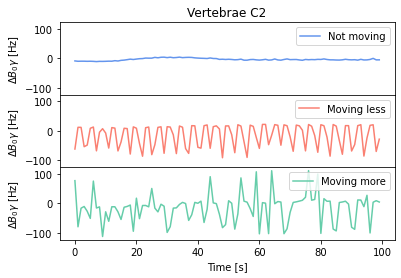

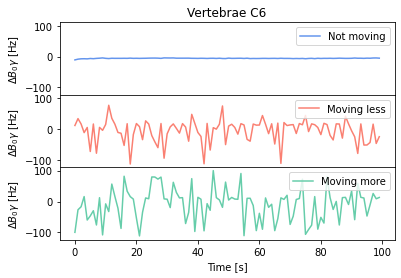

In [6]:
#The list is reversed which indicates that the C2 vertebra is at 12, while the C6 vertebrae is at 5
subplots_SpecificVertebrae(tot_noMove[:,12], tot_lessMove[:,12], tot_moreMove[:,12], 'C2')
subplots_SpecificVertebrae(tot_noMove[:,5], tot_lessMove[:,5], tot_moreMove[:,5], 'C6')

## Standard deviation of navigator traces for each of the cervical vertebrae
The C7 and T1 vertebrae where not plotted due to signal loss.

In [7]:
def standardDeviation_list(tot_noMove, tot_lessMove, tot_moreMove):
    '''
    Calculates the standard deviation for each of the vertebras where the material has no-, less- and more movement.
    
    Parameters: 
    ---------
    tot_noMove: list
        list of all the navigators for each of the vertebras where there is no movement of the material
    tot_lessMove: list
        list of all the navigators for each of the vertebras where there is less movement of the material
    tot_moreMove: list
        list of all the navigators for each of the vertebras where there is more movement of the material
    
    Returns: 
    -------
    std_noMove: list
        list of the standard deviation value for each cervical vertebrae where there is no movement of the material
    std_lessMove: list
        list of the standard deviation value for each cervical vertebrae where there is less movement of the material
    std_moreMove:
        list of the standard deviation value for each cervical vertebrae where there is more movement of the material
    '''
    
    std_noMove =[]
    std_lessMove = []
    std_moreMove = []

    for i in range(len(tot_noMove[0])-4): #not including the C7 and T1 vertebrae
        std_noMove.append(statistics.stdev(tot_noMove[:,i+4])) #skipping the T1 and C7 vertebare
        std_lessMove.append(statistics.stdev(tot_lessMove[:,i+4]))
        std_moreMove.append(statistics.stdev(tot_moreMove[:,i+4]))
        
    std_noMove.reverse() #to make it in the correct order
    std_lessMove.reverse()
    std_moreMove.reverse()
    return std_noMove, std_lessMove, std_moreMove

In [8]:
def standardDeviation_plot(std_noMove, std_lessMove, std_moreMove):
    '''
    Plots the standard deviation for each of the cervical vertebras where there is no-, less- and more movement of the material
    
    Parameters: 
    ----------
    std_noMove: list
        list of the standard deviation value for each cervical vertebrae where there is no movement of the material
    std_lessMove: list
        list of the standard deviation value for each cervical vertebrae where there is less movement of the material
    std_moreMove:
        list of the standard deviation value for each cervical vertebrae where there is more movement of the material
    '''
    
    vertebrae_level = [0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1, 4.9, 5.1, 5.9, 6.1]
    vertebare_list = [1,2,3,4,5,6]
    vertebrae_level_sec = ["C1", "C2", "C3", "C4", "C5", "C6"]
    fig = plt.figure(figsize=(9,4.5))
    plt.plot(vertebrae_level, std_noMove, 'o-', color = "cornflowerblue", label = "Not moving")
    plt.plot(vertebrae_level, std_lessMove, 'o-', color = "pink", label = "Moving less")
    plt.plot(vertebrae_level, std_moreMove, 'o-', color = "green", label = "Moving more")
    plt.legend()
    plt.ylabel(f"$\Delta B_0 \gamma$ [Hz] ", size = 12)
    plt.xticks(vertebare_list, vertebrae_level_sec)
    plt.xlabel('Vertebrae level', size = 12)
    plt.title(f"Standard deviation of navigator traces for the cervical vertibra's", size = 15)
    plt.show()

    #fig.savefig(f"Results_navigatorPlots/StandardDeviationPlot.pdf", bbox_inches='tight')

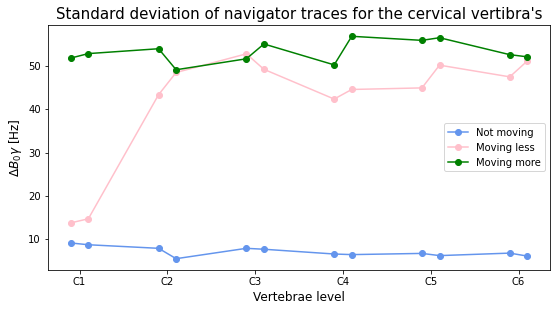

In [9]:
std_noMove, std_lessMove, std_moreMove = standardDeviation_list(tot_noMove, tot_lessMove, tot_moreMove)
standardDeviation_plot(std_noMove, std_lessMove, std_moreMove)